<a href="https://colab.research.google.com/github/DerinOgrenme2021/KadirAtalay/blob/main/Sklearn_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


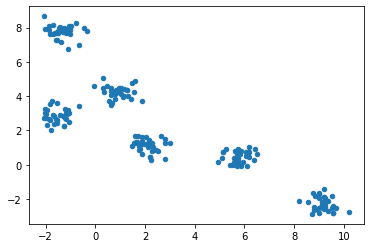

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=6, cluster_std=0.4, random_state=0)
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], s=20)

In [4]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=6)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)
y_kmeans

array([4, 3, 3, 1, 5, 0, 4, 2, 5, 1, 4, 5, 2, 0, 3, 5, 2, 3, 5, 5, 0, 0,
       0, 5, 4, 2, 3, 2, 4, 4, 0, 2, 0, 5, 5, 3, 0, 1, 1, 0, 2, 2, 2, 1,
       5, 3, 5, 5, 0, 4, 0, 4, 1, 2, 4, 3, 2, 0, 5, 1, 0, 2, 4, 3, 1, 2,
       5, 3, 4, 5, 2, 4, 0, 1, 0, 2, 0, 2, 5, 4, 3, 3, 4, 2, 3, 1, 1, 2,
       2, 1, 4, 0, 5, 5, 3, 3, 0, 4, 3, 0, 5, 5, 4, 1, 3, 4, 5, 3, 5, 3,
       4, 2, 1, 4, 0, 4, 3, 4, 2, 1, 2, 2, 4, 5, 3, 1, 1, 5, 3, 4, 0, 1,
       5, 5, 3, 1, 5, 4, 1, 3, 1, 5, 3, 4, 4, 2, 3, 1, 3, 0, 2, 2, 3, 1,
       5, 1, 0, 4, 0, 4, 4, 5, 3, 1, 2, 4, 0, 0, 1, 0, 2, 1, 0, 0, 4, 5,
       1, 1, 3, 2, 2, 0, 3, 0, 0, 2, 2, 1, 5, 3, 1, 5, 1, 5, 3, 0, 4, 2,
       1, 2], dtype=int32)

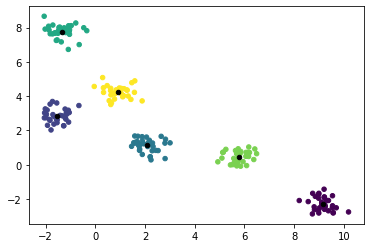

In [5]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans, s=20)
cent = kmeans.cluster_centers_
plt.scatter(cent[:,0],cent[:,1], c='black',s=20)

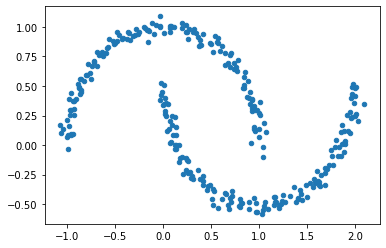

In [6]:
from sklearn.datasets import make_moons
X,y = make_moons(300,noise=0.04,random_state=0)
plt.scatter(X[:,0],X[:,1], s=20)

In [ ]:
model = KMeans(2,random_state=0).fit(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


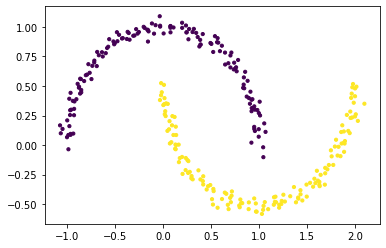

In [7]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=labels,s=10)

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
print(digits.data.shape)

kmeans = KMeans(n_clusters=10,random_state=0)
clusters = kmeans.fit_predict(digits.data)
centers=kmeans.cluster_centers_
print(centers.data.shape)

(1797, 64)
(10, 64)


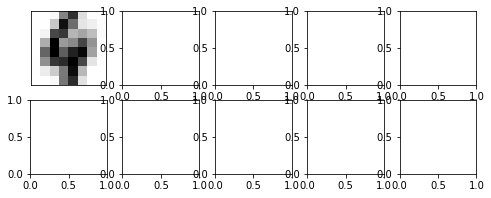

In [9]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat,centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center,interpolation="nearest",cmap = plt.cm.binary)
  break

In [23]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
fig,ax = plt.s

In [18]:
data = flower/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [21]:
from  sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_color = kmeans.cluster_centers_[kmeans.predict(data)]
new_color

array([[0.01544308, 0.07712418, 0.05243958],
       [0.01544308, 0.07712418, 0.05243958],
       [0.01544308, 0.07712418, 0.05243958],
       ...,
       [0.03324715, 0.14421461, 0.12432665],
       [0.03324715, 0.14421461, 0.12432665],
       [0.03324715, 0.14421461, 0.12432665]])

Text(0.5, 1.0, 'Compressed Image')

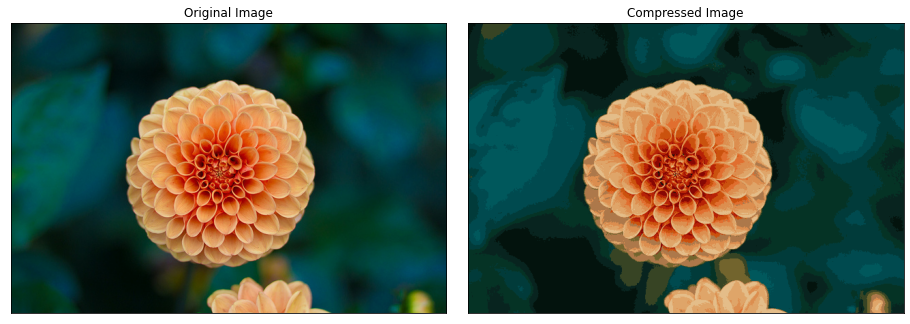

In [24]:
flower_compressed = new_color.reshape(flower.shape)
fig, ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(flower)
ax[0].set_title("Original Image")
ax[1].imshow(flower_compressed)
ax[1].set_title("Compressed Image")